In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit = pd.read_csv("E:/Python Programs/credit.csv")
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [4]:
credit.default.value_counts()

default
1    700
2    300
Name: count, dtype: int64

In [5]:
credit.default = credit.default.apply(lambda x: "Non-Defaulters" if x==1 else "Defaulters")

In [6]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,Non-Defaulters,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,Defaulters,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,Non-Defaulters,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,Non-Defaulters,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,Defaulters,2,none,yes,skilled employee


In [7]:
credit.default.value_counts()

default
Non-Defaulters    700
Defaulters        300
Name: count, dtype: int64

In [8]:
credit.groupby("default").describe()[["months_loan_duration", "amount"]]

months_loan_duration                                         \
                              count       mean        std  min   25%   50%   
default                                                                      
Defaulters                    300.0  24.860000  13.282639  6.0  12.0  24.0   
Non-Defaulters                700.0  19.207143  11.079564  4.0  12.0  18.0   

                           amount                                           \
                 75%   max  count         mean          std    min     25%   
default                                                                      
Defaulters      36.0  72.0  300.0  3938.126667  3535.818955  433.0  1352.5   
Non-Defaulters  24.0  60.0  700.0  2985.457143  2401.472278  250.0  1375.5   

                                          
                   50%      75%      max  
default                                   
Defaulters      2574.5  5141.50  18424.0  
Non-Defaulters  2244.0  3634.75  15857.0

In [9]:
credit.groupby(["default", "credit_history"]).describe()[["months_loan_duration", "amount"]]

months_loan_duration             \
                                                     count       mean   
default        credit_history                                           
Defaulters     critical                               50.0  25.100000   
               delayed                                28.0  28.392857   
               fully repaid                           25.0  28.200000   
               fully repaid this bank                 28.0  21.535714   
               repaid                                169.0  24.260355   
Non-Defaulters critical                              243.0  18.333333   
               delayed                                60.0  25.200000   
               fully repaid                           15.0  27.333333   
               fully repaid this bank                 21.0  24.238095   
               repaid                                361.0  18.168975   

                                                                          \
                                             std  min   25%   50%    75%   
default        credit_history                                              
Defaulters     critical                12.058108  6.0  18.0  22.5  36.00   
               delayed                 11.474091  6.0  21.0  24.0  36.00   
               fully repaid            14.722432  9.0  15.0  24.0  45.00   
               fully repaid this bank  13.242698  6.0  12.0  19.5  24.00   
               repaid                  13.613400  6.0  12.0  24.0  36.00   
Non-Defaulters critical                10.418118  4.0  12.0  15.0  24.00   
               delayed                 13.551909  6.0  15.0  24.0  33.75   
               fully repaid            15.778225  6.0  15.0  30.0  39.00   
               fully repaid this bank  13.556935  6.0  12.0  24.0  30.00   
               repaid                  10.177957  4.0  12.0  15.0  24.00   

                                            amount                            \
                                        max  count         mean          std   
default        credit_history                                                  
Defaulters     critical                48.0   50.0  4094.940000  3197.370785   
               delayed                 60.0   28.0  3848.214286  2584.699071   
               fully repaid            54.0   25.0  5526.240000  4769.220772   
               fully repaid this bank  60.0   28.0  3371.607143  3267.343777   
               repaid                  72.0  169.0  3765.562130  3572.489673   
Non-Defaulters critical                60.0  243.0  2880.855967  2288.195559   
               delayed                 60.0   60.0  4514.650000  3426.900917   
               fully repaid            54.0   15.0  4938.066667  3397.573430   
               fully repaid this bank  48.0   21.0  3309.238095  2998.553650   
               repaid                  60.0  361.0  2701.739612  2040.140299   

                                                                         \
                                          min      25%     50%      75%   
default        credit_history                                             
Defaulters     critical                 691.0  1508.25  2797.5  5807.00   
               delayed                 1024.0  1883.00  2559.0  5208.50   
               fully repaid             950.0  2278.00  4165.0  6199.00   
               fully repaid this bank   433.0  1247.50  1742.0  5450.75   
               repaid                   433.0  1282.00  2397.0  4611.00   
Non-Defaulters critical                 250.0  1322.50  2096.0  3617.00   
               delayed                  585.0  1909.50  3293.5  6989.50   
               fully repaid             426.0  2686.00  4221.0  7180.50   
               fully repaid this bank   339.0  1559.00  2483.0  3609.00   
               repaid                   276.0  1364.00  2141.0  3416.00   

                                                
                                 

In [10]:
X = credit[["months_loan_duration", "amount", "credit_history", "purpose", "personal_status", "checking_balance", "age"]]
y = credit["default"]

In [11]:
credit.credit_history.value_counts()

credit_history
repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: count, dtype: int64

In [12]:
credit_default = credit[credit.default=="Defaulters"]
credit_nondefault = credit[credit.default=="Non-Defaulters"]
credit_default.shape, credit_nondefault.shape

((300, 21), (700, 21))

In [13]:
credit_default.purpose.value_counts(normalize=True)

purpose
car (new)              0.296667
radio/tv               0.206667
furniture              0.193333
business               0.113333
education              0.073333
car (used)             0.056667
repairs                0.026667
others                 0.016667
domestic appliances    0.013333
retraining             0.003333
Name: proportion, dtype: float64

In [14]:
credit_nondefault.purpose.value_counts(normalize=True)

purpose
radio/tv               0.311429
car (new)              0.207143
furniture              0.175714
car (used)             0.122857
business               0.090000
education              0.040000
repairs                0.020000
domestic appliances    0.011429
retraining             0.011429
others                 0.010000
Name: proportion, dtype: float64

In [15]:
credit_default.personal_status.value_counts(normalize=True)

personal_status
single male      0.486667
female           0.363333
married male     0.083333
divorced male    0.066667
Name: proportion, dtype: float64

In [16]:
credit_nondefault.personal_status.value_counts(normalize=True)

personal_status
single male      0.574286
female           0.287143
married male     0.095714
divorced male    0.042857
Name: proportion, dtype: float64

In [17]:
encoding = LabelEncoder()
X["credit_history"] = encoding.fit_transform(X["credit_history"])
X["purpose"] = encoding.fit_transform(X["purpose"])
X["personal_status"] = encoding.fit_transform(X["personal_status"])
X["checking_balance"] = encoding.fit_transform(X["checking_balance"])

In [18]:
X.head()

,months_loan_duration,amount,credit_history,purpose,personal_status,checking_balance,age
0,6,1169,0,7,3,1,67
1,48,5951,4,7,1,0,22
2,12,2096,0,4,3,3,49
3,42,7882,4,5,3,1,45
4,24,4870,1,1,3,1,53


In [19]:
X.credit_history.value_counts()

credit_history
4    530
0    293
1     88
3     49
2     40
Name: count, dtype: int64

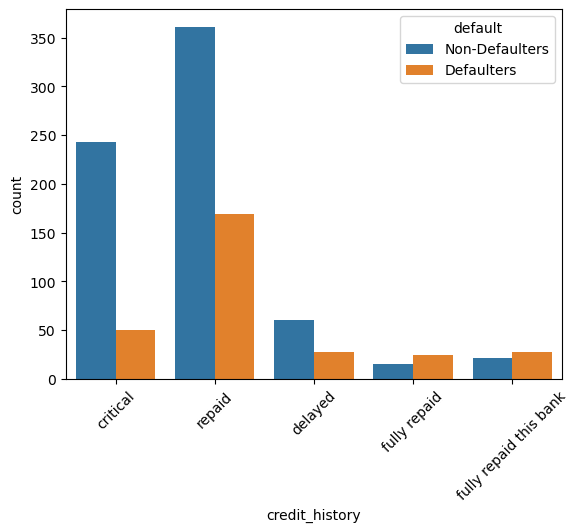

In [20]:
sns.countplot(x="credit_history", data=credit, hue="default")
plt.xticks(rotation=45)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 7), (800,), (200, 7), (200,))

In [22]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=15, max_leaf_nodes=28)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.78625, 0.695)

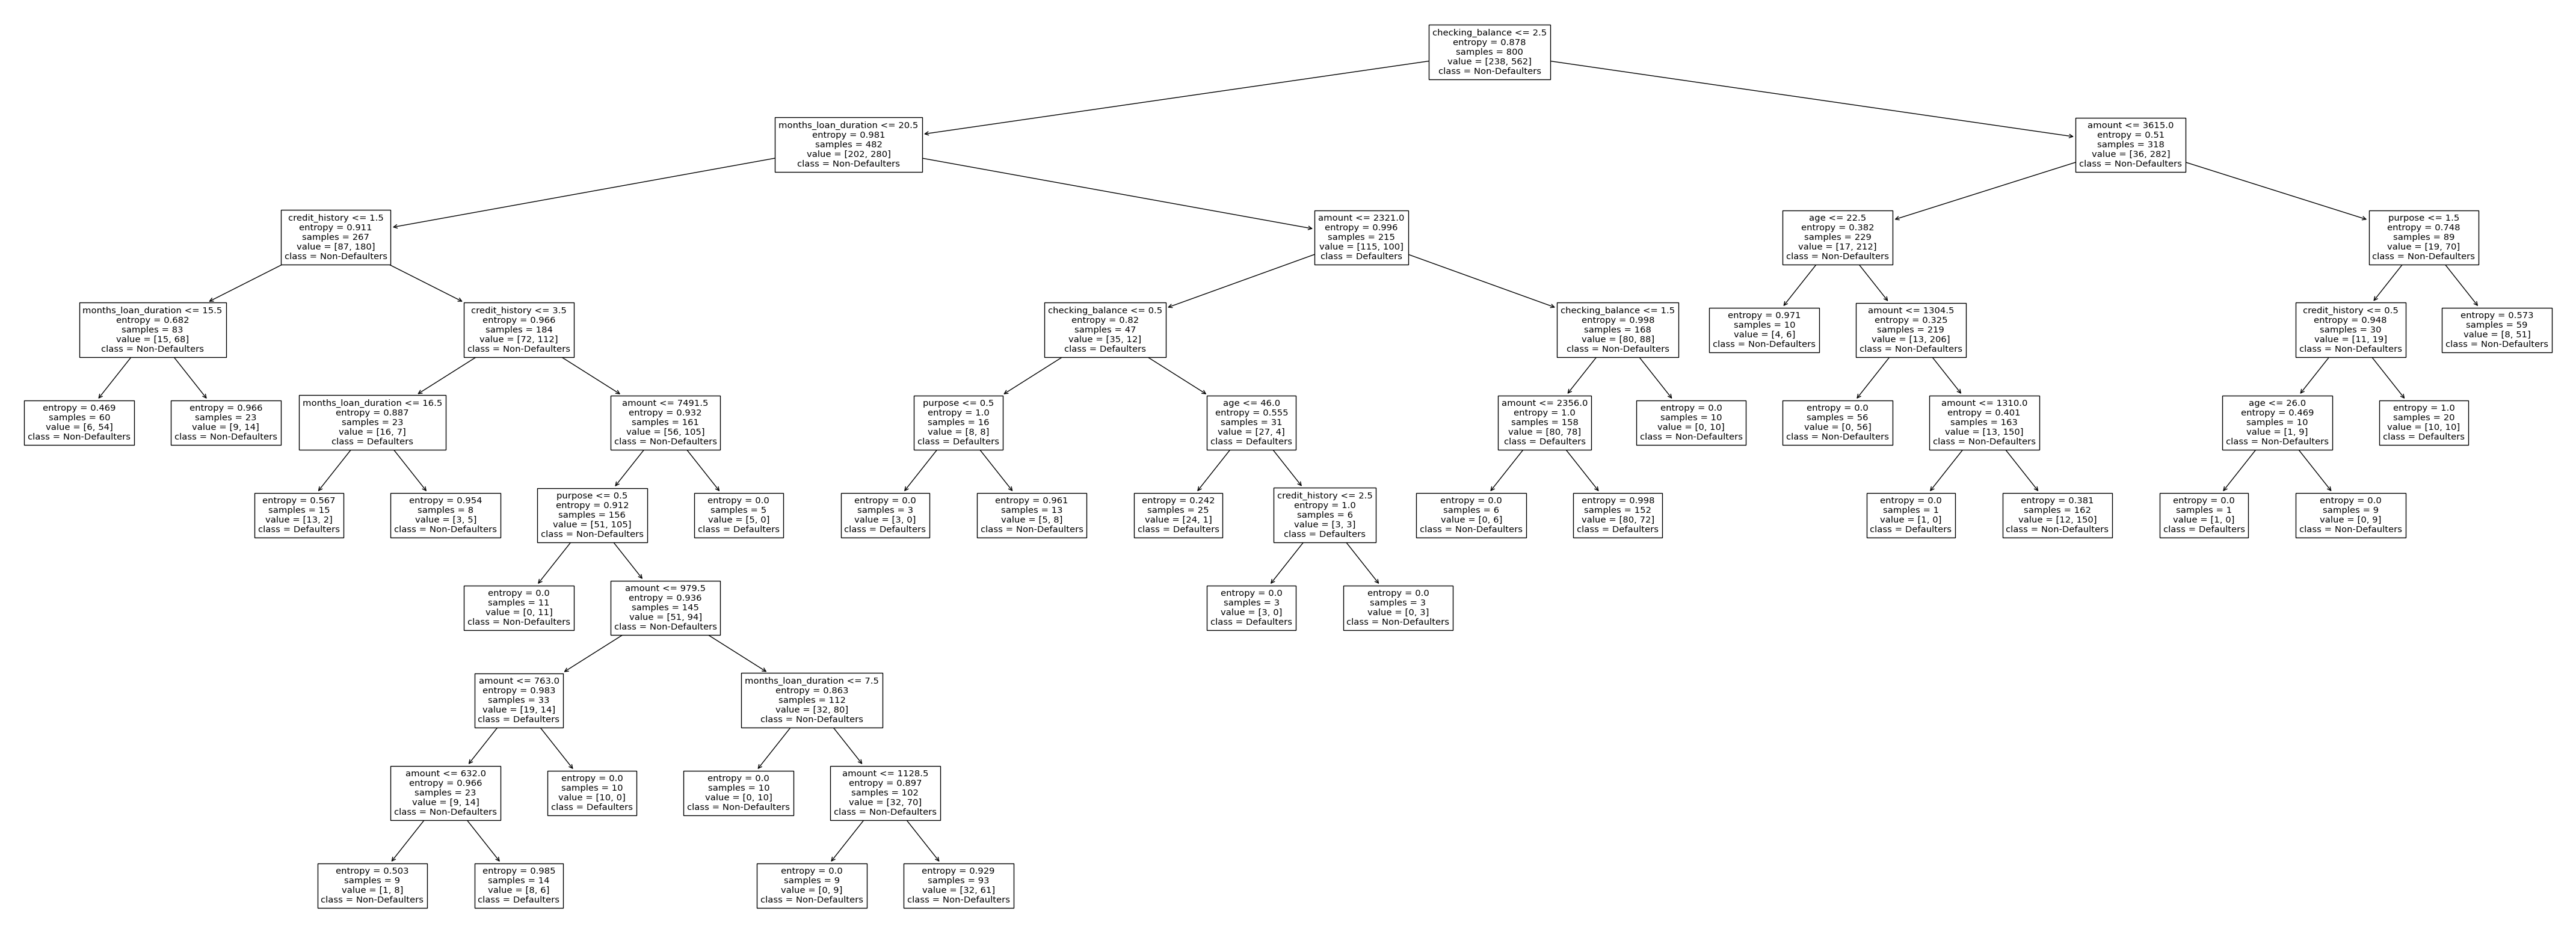

In [23]:
plt.figure(figsize=[55,20])
plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

In [24]:
y_predict = model.predict(X_test)

In [25]:
accuracy_score(y_test, y_predict)

0.695

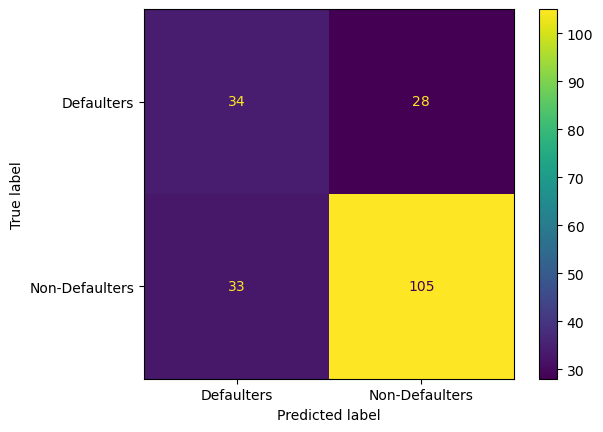

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()

In [27]:
model.get_depth(), model.get_n_leaves()

(9, 28)

In [28]:
X.columns

Index(['months_loan_duration', 'amount', 'credit_history', 'purpose',
       'personal_status', 'checking_balance', 'age'],
      dtype='object')

In [29]:
# This is only in Decision Tree Algorithm that we can check which feature is given what importance.

model.feature_importances_

array([0.13177416, 0.2775048 , 0.1095628 , 0.06116134, 0.        ,
       0.35074586, 0.06925104])